In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

In [4]:
object = StandardScaler()
df =pd.read_csv("gene_data.csv", header= None)
df.columns=["time","one", "two", "three", "four", "five"]
df1 =df.drop(["time"], axis=1)
fe =object.fit_transform(df1)
df = pd.DataFrame({"one":list(fe[:,:1].flatten()), "two":list(fe[:,1:2].flatten()), "three":list(fe[:,2:3].flatten()), "four":list(fe[:,3:4].flatten()), "five":list(fe[:,4:5].flatten()), "bias":np.ones(df.shape[0])})
df

,one,two,three,four,five,bias
0,-1.021405,-1.704074,-1.085121,-2.915758,-3.329041,1.0
1,-1.373602,-2.151508,-1.186075,-2.640678,-2.910831,1.0
2,-1.393911,-2.137116,-1.218111,-2.079348,-2.735119,1.0
3,-1.792613,-1.898602,-1.319021,-1.818488,-2.145862,1.0
4,-1.725596,-1.667774,-1.211729,-1.567988,-2.015099,1.0
...,...,...,...,...,...,...
296,1.423916,1.200089,0.853426,0.849062,0.783660,1.0
297,0.992103,0.990230,0.844204,0.613995,0.588137,1.0
298,1.131688,1.148446,1.045855,0.561612,0.488146,1.0
299,1.253046,0.958799,0.980448,0.632117,0.380071,1.0


In [5]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='one', ylabel='one'>,
        <Axes: xlabel='two', ylabel='one'>,
        <Axes: xlabel='three', ylabel='one'>,
        <Axes: xlabel='four', ylabel='one'>,
        <Axes: xlabel='five', ylabel='one'>],
       [<Axes: xlabel='one', ylabel='two'>,
        <Axes: xlabel='two', ylabel='two'>,
        <Axes: xlabel='three', ylabel='two'>,
        <Axes: xlabel='four', ylabel='two'>,
        <Axes: xlabel='five', ylabel='two'>],
       [<Axes: xlabel='one', ylabel='three'>,
        <Axes: xlabel='two', ylabel='three'>,
        <Axes: xlabel='three', ylabel='three'>,
        <Axes: xlabel='four', ylabel='three'>,
        <Axes: xlabel='five', ylabel='three'>],
       [<Axes: xlabel='one', ylabel='four'>,
        <Axes: xlabel='two', ylabel='four'>,
        <Axes: xlabel='three', ylabel='four'>,
        <Axes: xlabel='four', ylabel='four'>,
        <Axes: xlabel='five', ylabel='four'>],
       [<Axes: xlabel='one', ylabel='five'>,
        <Axes: xlabel='two', ylabel='fiv

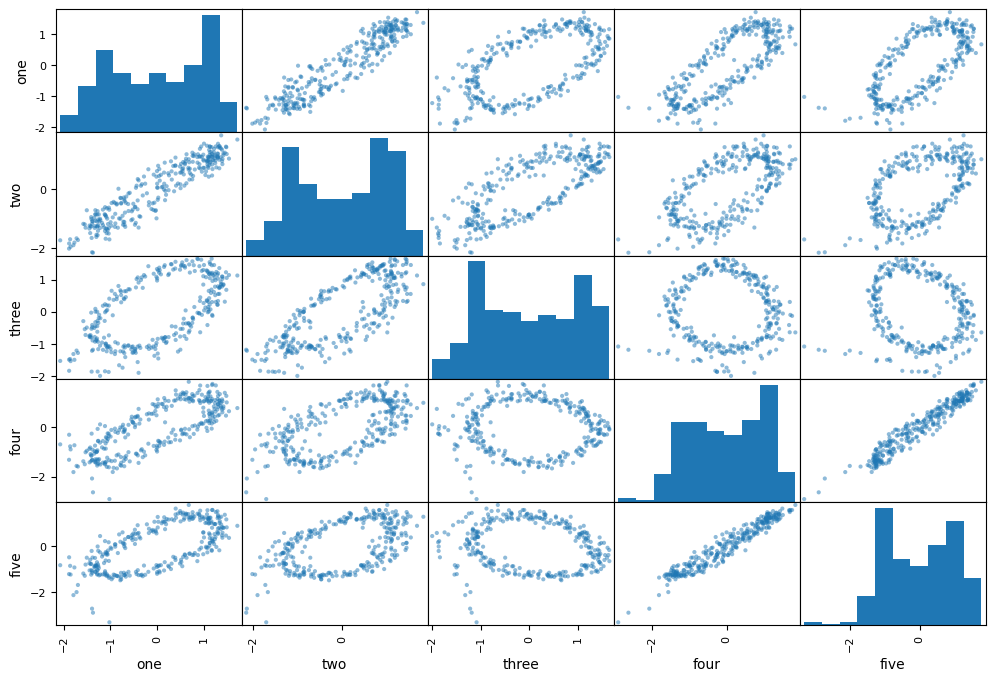

In [7]:
attributes = ["one", "two", "three","four","five"]
scatter_matrix(df[attributes], figsize=(12, 8))

In [8]:
df.corrwith(df["two"])

/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/opt/homebrew/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


one      0.935235
two      1.000000
three    0.763273
four     0.618398
five     0.524055
bias          NaN
dtype: float64

In [10]:
# x2 = 𝜃1(𝑥4) + 𝜃2(𝑥3**2) + 𝜃𝑏𝑖𝑎𝑠
from numpy.linalg import inv
model1 =pd.DataFrame({"four": df["four"], "three":df["three"].apply(lambda x:x**2), "bias":np.ones(df.shape[0])})
weights_model1 =(inv(np.dot(model1.T, model1)).dot(model1.T)).dot(df["two"])
weights_model1

array([ 0.61507126, -0.0470417 ,  0.0470417 ])

In [13]:
cost_model1 = np.sum(((model1["four"]*0.61507126 -model1["three"]*0.0470417+0.0470417)-df["two"])**2)/(2*df.shape[0])
cost_model1

0.30803396437814856

In [14]:
RSS_model1 =np.sum(((model1["four"]*0.61507126 -model1["three"]*0.0470417+0.0470417)-df["two"])**2)
RSS_model1

185.43644655564543

In [15]:
sigma_square_model1 = RSS_model1/(df.shape[0]-1)
sigma_square_model1

0.6181214885188181

In [16]:
log_likelihood_ratio_model1 = -(df.shape[0]/2)*np.log10(2*np.pi) - (df.shape[0]/2)*np.log10(sigma_square_model1) - 1/(2*sigma_square_model1)*RSS_model1
log_likelihood_ratio_model1

-238.6826833740377

In [17]:
#𝐴𝐼𝐶 = 2𝑘 − 2*ln𝑝(𝐷|𝜽) and 𝐵𝐼𝐶 = 𝑘 ∙ ln (𝑛) − 2 ln(𝑝(𝐷|𝜽̂))
AIC_model1 = 2*len(weights_model1) - 2*(log_likelihood_ratio_model1)
BIC_model1 = len(weights_model1)*np.log10(df.shape[0]) - 2*log_likelihood_ratio_model1
AIC_model1, BIC_model1

(483.3653667480754, 484.80106623485693)

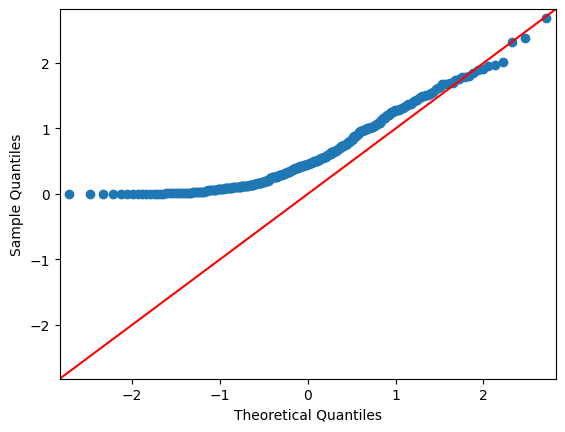

In [18]:
residuals_model1 = ((model1["four"]*0.61507126 -model1["three"]*0.0470417+0.0470417)-df["two"])**2
#residuals_model1 =((model1["four"]*1.18376813 +model1["three"]*0.32576127-0.89071512)-df["two"])**2
import statsmodels.api as dist 
import pylab as graph 
dist.qqplot(residuals_model1, line ='45') 
graph.show() 

In [20]:
#𝜃1(𝑥4) + 𝜃2(𝑥3)**2 + 𝜃3(𝑥5) + 𝜃𝑏𝑖𝑎𝑠
model2 =pd.DataFrame({"four": df["four"], "three":df["three"].apply(lambda x:x**2), "five":df["five"], "bias":np.ones(df.shape[0])})
weights_model2 =(inv(np.dot(model2.T, model2)).dot(model2.T)).dot(df["two"])
weights_model2

array([ 1.85169256, -0.16619721, -1.28790927,  0.16619721])

In [23]:
cost_model2 = np.sum(((model2["four"]*(1.85169256) +model2["three"]*(-0.16619721)+model2["five"]*(-1.28790927)-0.16619721)-df["two"])**2)/(2*df.shape[0])
cost_model2

0.3138572445730699

In [24]:
RSS_model2 = np.sum(((model2["four"]*(1.85169256) +model2["three"]*(-0.16619721)+model2["five"]*(-1.28790927)-0.16619721)-df["two"])**2)
RSS_model2

188.94206123298807

In [25]:
sigma_square_model2 = RSS_model2/(df.shape[0]-1)
sigma_square_model2

0.6298068707766269

In [26]:
log_likelihood_ratio_model2 = -(df.shape[0]/2)*np.log10(2*np.pi) - (df.shape[0]/2)*np.log10(sigma_square_model2) - 1/(2*sigma_square_model2)*RSS_model2
log_likelihood_ratio_model2

-239.90678301380382

In [27]:
#𝐴𝐼𝐶 = 2𝑘 − 2*ln𝑝(𝐷|𝜽) and 𝐵𝐼𝐶 = 𝑘 ∙ ln (𝑛) − 2 ln(𝑝(𝐷|𝜽̂))
AIC_model2 = 2*len(weights_model2) - 2*(log_likelihood_ratio_model2)
BIC_model2 = len(weights_model2)*np.log10(df.shape[0]) - 2*log_likelihood_ratio_model2
AIC_model2, BIC_model2

(487.81356602760764, 489.727832009983)

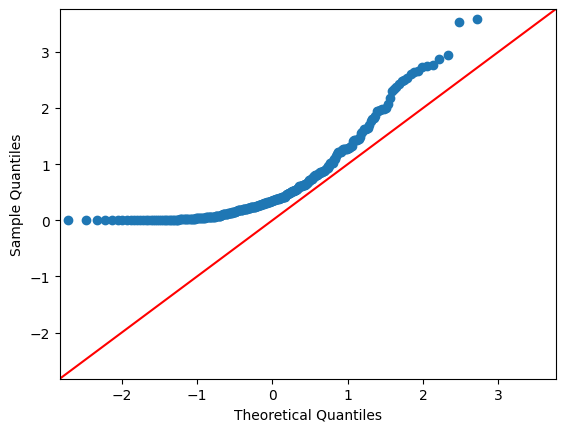

In [28]:
residuals_model2 =((model2["four"]*(1.85169256) +model2["three"]*(-0.16619721)+model2["five"]*(-1.28790927)-0.16619721)-df["two"])**2
import statsmodels.api as dist 
import pylab as graph 
dist.qqplot(residuals_model2, line ='45') 
graph.show() 

In [30]:
# Model 3: 𝑦 = 𝜃1*𝑥3 + 𝜃2(𝑥4) + 𝜃3(𝑥5**3)
# Model 4: 𝑦 = 𝜃1(𝑥4) + 𝜃2(𝑥3)**2 + 𝜃3(𝑥5)**3 + 𝜃𝑏𝑖𝑎𝑠
#Model 5: 𝑦 = 𝜃1(𝑥4) + 𝜃2(𝑥1)**2 + 𝜃3(𝑥3)**2 + 𝜃𝑏𝑖𝑎𝑠
model3 =pd.DataFrame({"three": df["three"], "four":df["four"],"five":df["five"].apply(lambda x:x**3), "bias":np.ones(df.shape[0])})
weights_model3 =(inv(np.dot(model3.T, model3)).dot(model3.T)).dot(df["two"])
weights_model3

array([ 0.75166806,  0.62600217, -0.01137045, -0.0026381 ])

In [32]:
cost_model3 = np.sum(((model3["three"]*(0.75166806) +model3["four"]*(0.62600217)+model3["five"]*(-0.01137045)--0.0026381)-df["two"])**2)/(2*df.shape[0])
cost_model3

0.026989858364917

In [33]:
RSS_model3 = np.sum(((model3["three"]*(0.75166806) +model3["four"]*(0.62600217)+model3["five"]*(-0.01137045)--0.0026381)-df["two"])**2)
RSS_model3

16.247894735680035

In [34]:
sigma_square_model3 = RSS_model3/(df.shape[0]-1)
sigma_square_model3

0.05415964911893345

In [35]:
log_likelihood_ratio_model3 = -(df.shape[0]/2)*np.log10(2*np.pi) - (df.shape[0]/2)*np.log10(sigma_square_model3) - 1/(2*sigma_square_model3)*RSS_model3
log_likelihood_ratio_model3

-79.54428441597238

In [36]:
#𝐴𝐼𝐶 = 2𝑘 − 2*ln𝑝(𝐷|𝜽) and 𝐵𝐼𝐶 = 𝑘 ∙ ln (𝑛) − 2 ln(𝑝(𝐷|𝜽̂))
AIC_model3 = 2*len(weights_model3) - 2*(log_likelihood_ratio_model3)
BIC_model3 = len(weights_model3)*np.log10(df.shape[0]) - 2*log_likelihood_ratio_model3
AIC_model3, BIC_model3

(167.08856883194477, 169.00283481432015)

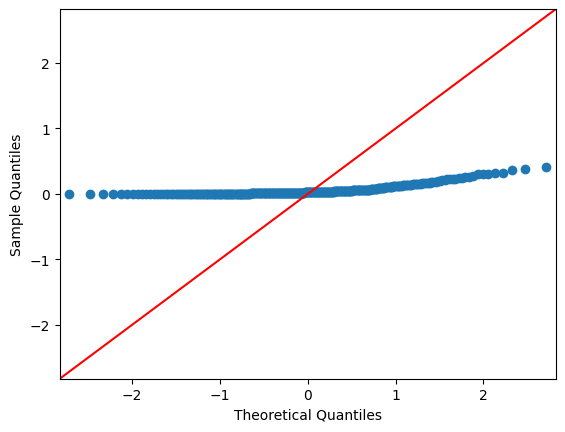

In [37]:
residuals_model3 =((model3["three"]*(0.75166806) +model3["four"]*(0.62600217)+model3["five"]*(-0.01137045)--0.0026381)-df["two"])**2
import statsmodels.api as dist 
import pylab as graph 
dist.qqplot(residuals_model3, line ='45') 
graph.show() 

In [39]:
# Model 4: 𝑦 = 𝜃1(𝑥4) + 𝜃2(𝑥3)**2 + 𝜃3(𝑥5)**3 + 𝜃𝑏𝑖𝑎𝑠
model4 =pd.DataFrame({"four": df["four"], "three":df["three"].apply(lambda x:x**2),"five":df["five"].apply(lambda x:x**3), "bias":np.ones(df.shape[0])})
weights_model4 =(inv(np.dot(model4.T, model4)).dot(model4.T)).dot(df["two"])
weights_model4

array([ 0.61301323, -0.04681785,  0.00099566,  0.04704886])

In [41]:
cost_model4 = np.sum(((model4["four"]*(0.61301323) +model4["three"]*(-0.04681785)+model3["five"]*(0.00099566)+0.04704886)-df["two"])**2)/(2*df.shape[0])
cost_model4

0.3080308814246251

In [43]:
RSS_model4 = np.sum(((model4["four"]*(0.61301323) +model4["three"]*(-0.04681785)+model3["five"]*(0.00099566)+0.04704886)-df["two"])**2)
RSS_model4

185.4345906176243

In [44]:
sigma_square_model4 = RSS_model4/(df.shape[0]-1)
sigma_square_model4

0.6181153020587477

In [45]:
log_likelihood_ratio_model4 = -(df.shape[0]/2)*np.log10(2*np.pi) - (df.shape[0]/2)*np.log10(sigma_square_model4) - 1/(2*sigma_square_model4)*RSS_model4
log_likelihood_ratio_model4

-238.6820292029331

In [46]:
#𝐴𝐼𝐶 = 2𝑘 − 2*ln𝑝(𝐷|𝜽) and 𝐵𝐼𝐶 = 𝑘 ∙ ln (𝑛) − 2 ln(𝑝(𝐷|𝜽̂))
AIC_model4 = 2*len(weights_model4) - 2*(log_likelihood_ratio_model4)
BIC_model4 = len(weights_model4)*np.log10(df.shape[0]) - 2*log_likelihood_ratio_model4
AIC_model4, BIC_model4

(485.3640584058662, 487.2783243882416)

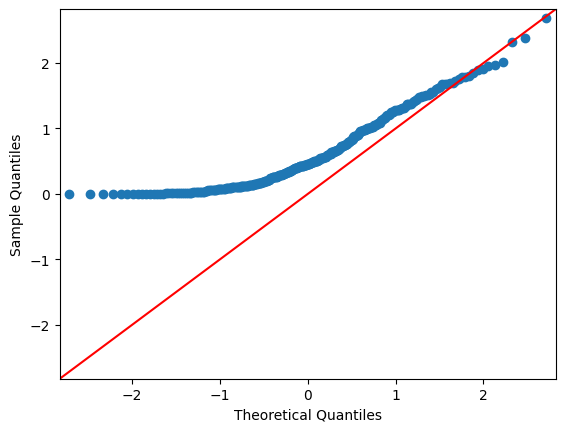

In [47]:
residuals_model4 =((model4["four"]*(0.61301323) +model4["three"]*(-0.04681785)+model4["five"]*(0.00099566)+0.04704886)-df["two"])**2
import statsmodels.api as dist 
import pylab as graph 
dist.qqplot(residuals_model4, line ='45') 
graph.show() 

In [49]:
#Model 5: 𝑦 = 𝜃1(𝑥4) + 𝜃2(𝑥1)**2 + 𝜃3(𝑥3)**2 + 𝜃𝑏𝑖𝑎𝑠
model5 =pd.DataFrame({"four": df["four"], "one":df["one"].apply(lambda x:x**2),"three":df["three"].apply(lambda x:x**2), "bias":np.ones(df.shape[0])})
weights_model5 =(inv(np.dot(model5.T, model5)).dot(model5.T)).dot(df["two"])
weights_model5

array([ 0.60243343, -0.09150741, -0.05230259,  0.14381   ])

In [51]:
cost_model5 = np.sum(((model5["four"]*(0.60243343) +model5["one"]*(-0.09150741)+model5["three"]*(-0.05230259)-0.14381)-df["two"])**2)/(2*df.shape[0])
cost_model5

0.34678377007089867

In [52]:
RSS_model5 = np.sum(((model5["four"]*(0.70356996) +model5["one"]*(0.18771882)+model5["three"]*(0.24270599)-0.41905128)-df["two"])**2)
RSS_model5

215.14741606112165

In [53]:
sigma_square_model5 = RSS_model5/(df.shape[0]-1)
sigma_square_model5

0.7171580535370722

In [54]:
log_likelihood_ratio_model5 = -(df.shape[0]/2)*np.log10(2*np.pi) - (df.shape[0]/2)*np.log10(sigma_square_model5) - 1/(2*sigma_square_model5)*RSS_model5
log_likelihood_ratio_model5

-248.39610960025556

In [55]:
#𝐴𝐼𝐶 = 2𝑘 − 2*ln𝑝(𝐷|𝜽) and 𝐵𝐼𝐶 = 𝑘 ∙ ln (𝑛) − 2 ln(𝑝(𝐷|𝜽̂))
AIC_model5 = 2*len(weights_model5) - 2*(log_likelihood_ratio_model5)
BIC_model5 = len(weights_model5)*np.log10(df.shape[0]) - 2*log_likelihood_ratio_model5
AIC_model5, BIC_model5

(504.7922192005111, 506.70648518288647)

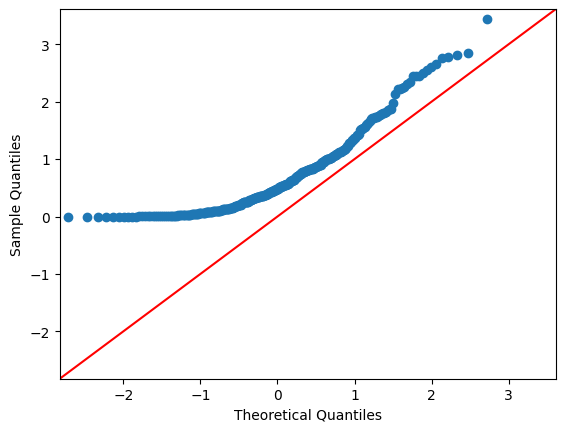

In [56]:
#Model_error_plot
residuals_model5 =((model5["four"]*(0.60243343) +model5["one"]*(-0.09150741)+model5["three"]*(-0.05230259)-0.14381)-df["two"])**2
import statsmodels.api as dist 
import pylab as graph 
dist.qqplot(residuals_model5, line ='45') 
graph.show() 

In [84]:
#Model_error_plot
df

,one,two,three,four,five,bias
0,-1.021405,-1.704074,-1.085121,-2.915758,-3.329041,1.0
1,-1.373602,-2.151508,-1.186075,-2.640678,-2.910831,1.0
2,-1.393911,-2.137116,-1.218111,-2.079348,-2.735119,1.0
3,-1.792613,-1.898602,-1.319021,-1.818488,-2.145862,1.0
4,-1.725596,-1.667774,-1.211729,-1.567988,-2.015099,1.0
...,...,...,...,...,...,...
296,1.423916,1.200089,0.853426,0.849062,0.783660,1.0
297,0.992103,0.990230,0.844204,0.613995,0.588137,1.0
298,1.131688,1.148446,1.045855,0.561612,0.488146,1.0
299,1.253046,0.958799,0.980448,0.632117,0.380071,1.0


In [85]:
model3["target"] = df["two"]
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(model3, test_size=0.3, random_state=42)
Y_train = train_set["target"]
Y_test = test_set["target"]
train_set.drop("target", axis=1, inplace=True)
test_set.drop("target", axis=1, inplace=True)
train_set, test_set

(        three      four      five  bias
 185  1.329579 -0.747519 -0.792121   1.0
 72  -0.744034 -1.422760 -1.230383   1.0
 15  -1.878583 -0.256444  0.003789   1.0
 10  -1.475670 -0.774086 -0.662040   1.0
 196 -0.204058 -1.511277 -1.973435   1.0
 ..        ...       ...       ...   ...
 188  0.624355 -1.209550 -1.630049   1.0
 71  -0.532435 -1.155263 -1.184418   1.0
 106  1.088679  1.065599  0.185454   1.0
 270 -1.234778 -0.434811 -0.055816   1.0
 102  0.553260  1.095990  1.857174   1.0
 
 [210 rows x 4 columns],
         three      four      five  bias
 177  1.417720  0.125258 -0.004258   1.0
 289  0.071379  1.256629  1.847335   1.0
 228  0.306407  1.069663  1.544288   1.0
 198 -0.449525 -1.300615 -0.601028   1.0
 60   1.016128 -1.075212 -1.853335   1.0
 ..        ...       ...       ...   ...
 119  1.308688 -0.530032 -0.455975   1.0
 19  -1.905456  0.748308  0.175583   1.0
 181  1.454792 -0.093904 -0.354840   1.0
 79  -1.168336 -0.548821 -0.010157   1.0
 114  1.266699  0.072339 -0.03

In [86]:
weights_model3_train =(inv(np.dot(train_set.T, train_set)).dot(train_set.T)).dot(Y_train)
weights_model3_train

array([ 0.76889225,  0.6261561 , -0.01479048,  0.00126436])

In [95]:
Predict_model3_train = (train_set["three"]*(0.76889225) +train_set["four"]*(0.6261561)+train_set["five"]*(-0.01479048)+0.00126436)
squared_errors_train = (Predict_model3_train - Y_train) ** 2

In [96]:
squared_errors_train

185    0.001120
72     0.043921
15     0.009686
10     0.008259
196    0.000279
         ...   
188    0.003633
71     0.009897
106    0.242978
270    0.074733
102    0.129406
Length: 210, dtype: float64

In [97]:
Predict_model3_test = (test_set["three"]*(0.76889225) +test_set["four"]*(0.6261561)+test_set["five"]*(-0.01479048)+0.00126436)

In [109]:
from scipy import stats
confidence = 0.95
squared_errors_test = (Predict_model3_test - Y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors_test) - 1, loc=squared_errors_test.mean(), scale=stats.sem(squared_errors_test)))

array([0.21796669, 0.28427297])

<ErrorbarContainer object of 3 artists>

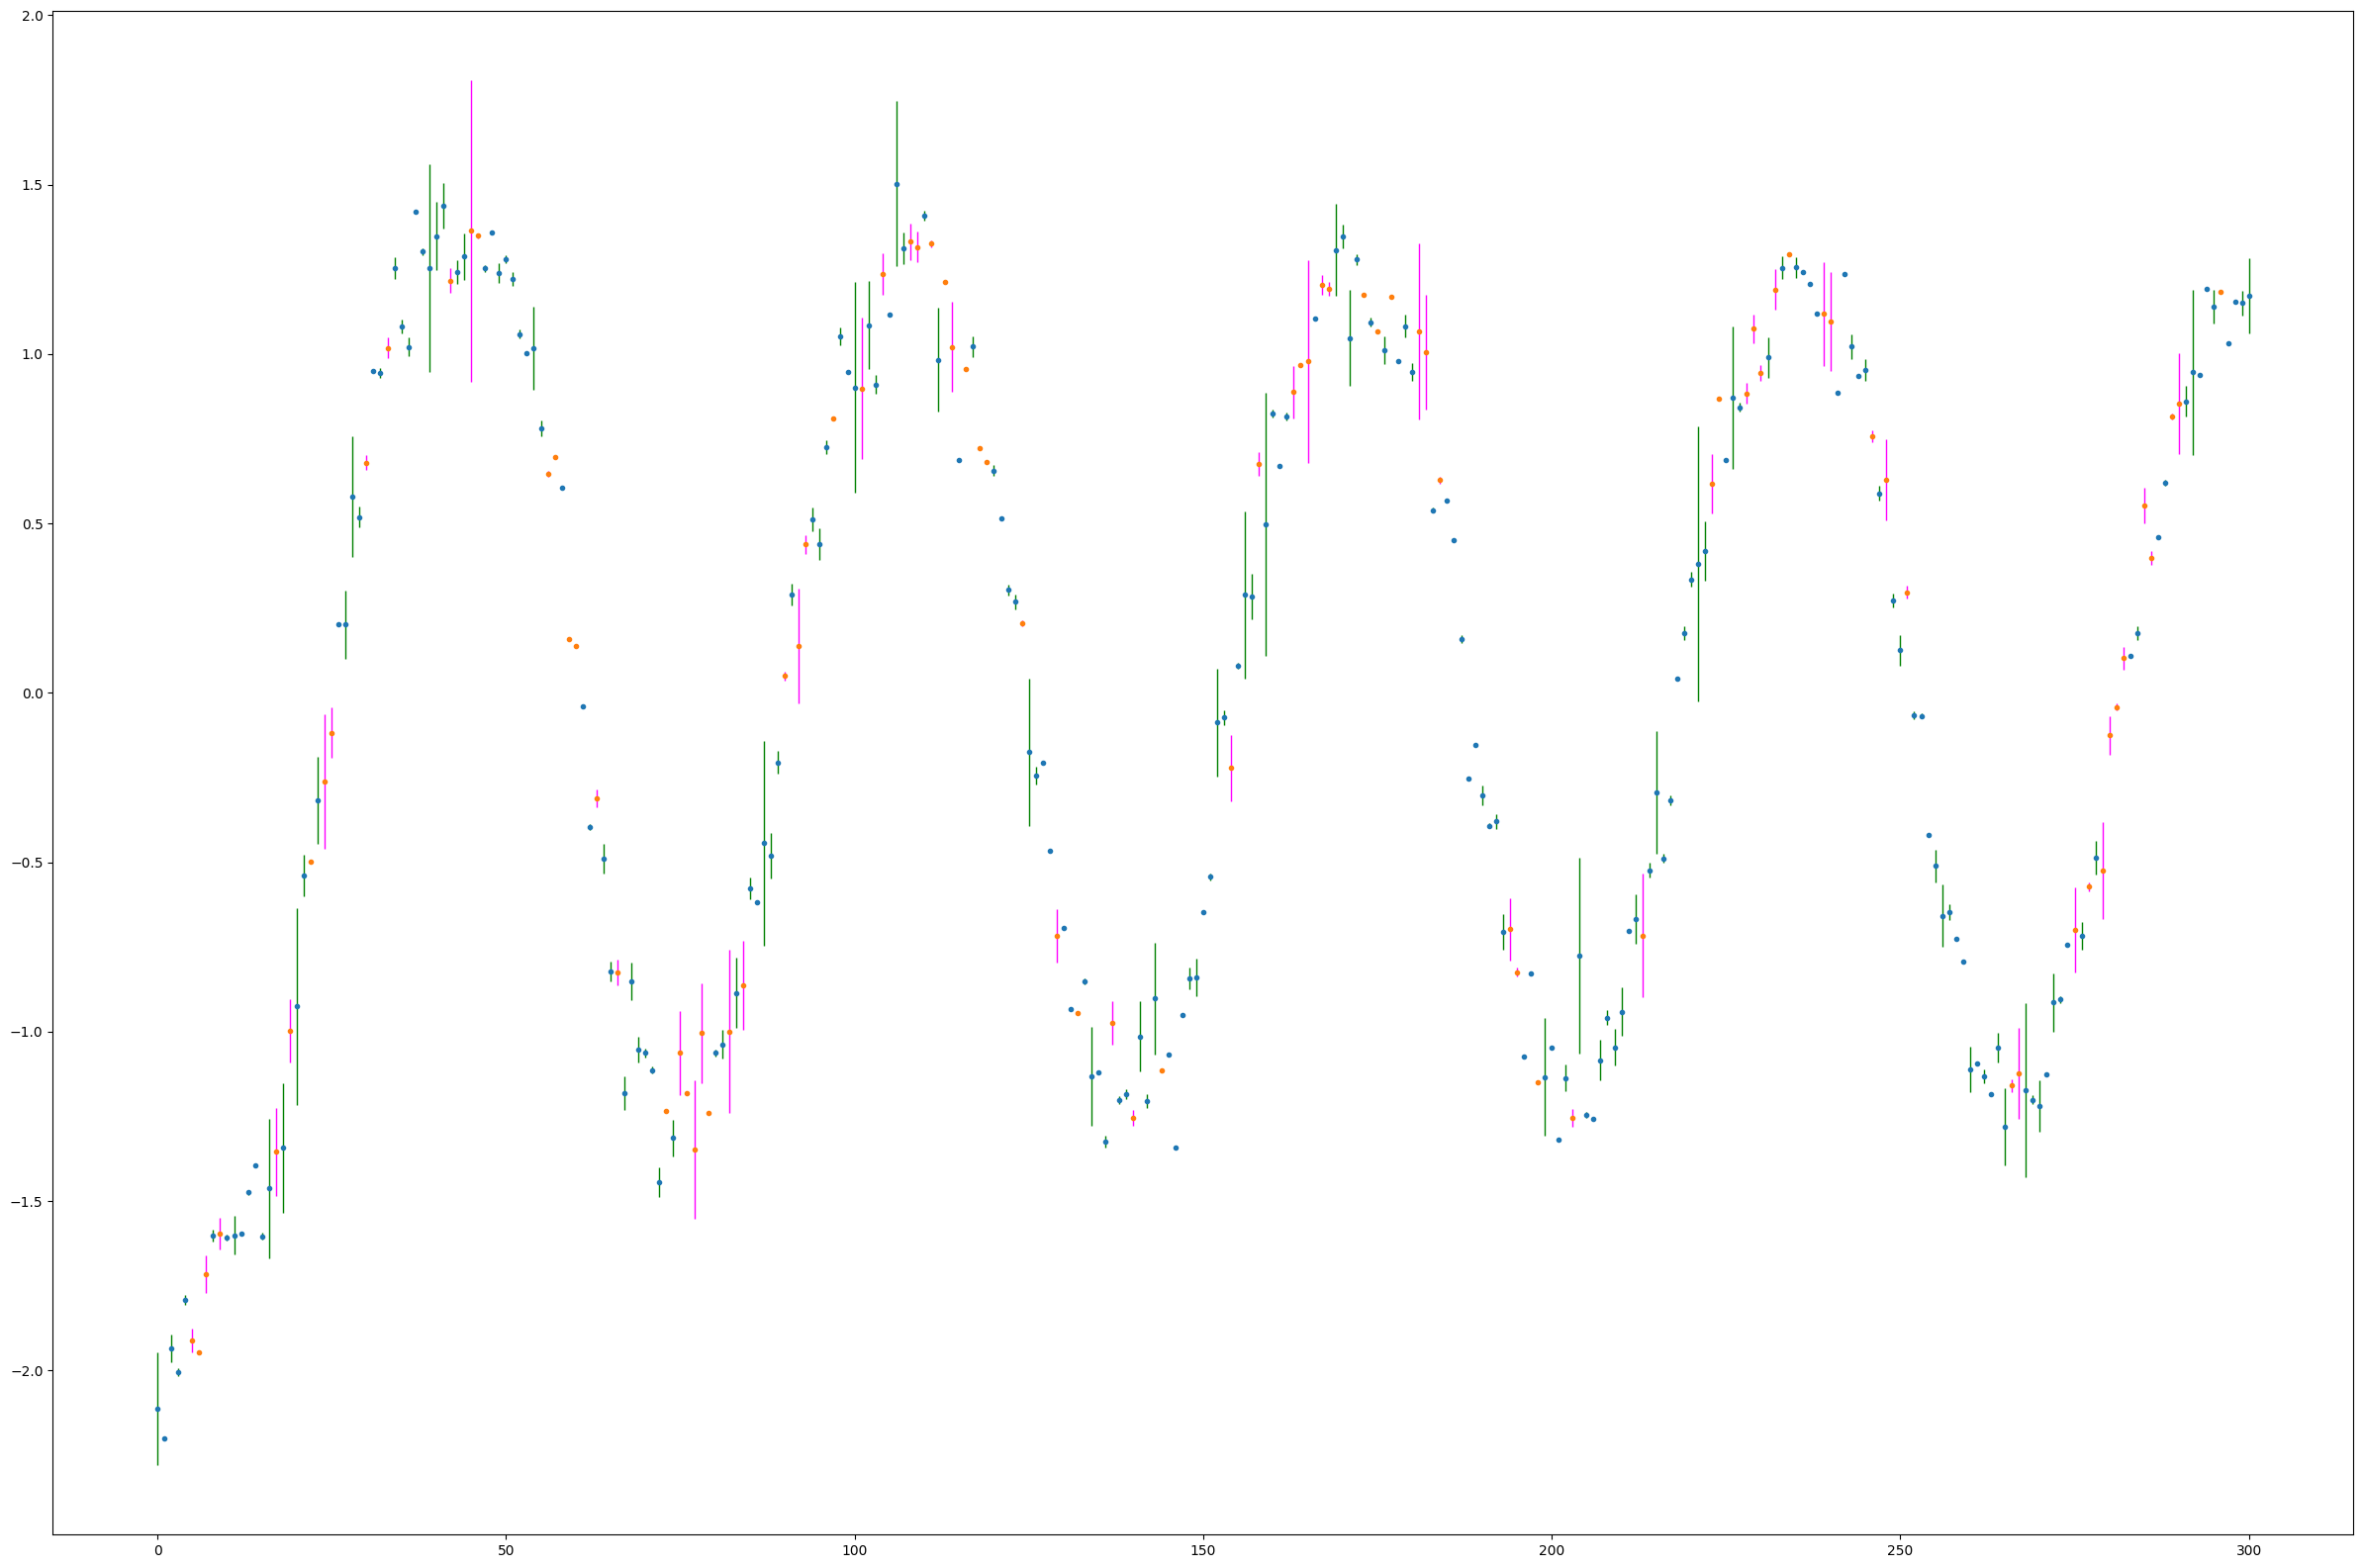

In [111]:
fig = plt.figure()
x= Predict_model3_train.sort_index().index.values
y = Predict_model3_train.sort_index()
plt.errorbar(x, y, yerr=squared_errors_train.sort_index().values, uplims=0.0, lolims = 0.0, xuplims=True, fmt = '.', ecolor='green', elinewidth=1,label='xuplims=True')
x = Predict_model3_test.sort_index().index.values
y = Predict_model3_test.sort_index()
fig.set_figwidth(30) 
fig.set_figheight(20) 
plt.errorbar(x, y, yerr=squared_errors_test.sort_index().values, uplims=0.0, lolims = 0.0, xuplims=True, fmt = '.',ecolor='magenta', elinewidth=1,label='xuplims=True')


In [100]:
import statistics
gene1_mean = statistics.mean(df["one"])
gene1_stdev = statistics.stdev(df["one"])
gene2_mean = statistics.mean(df["two"])
gene2_stdev = statistics.stdev(df["two"])
gene3_mean = statistics.mean(df["three"])
gene3_stdev = statistics.stdev(df["three"])
gene4_mean = statistics.mean(df["four"])
gene4_stdev = statistics.stdev(df["four"])
gene5_mean = statistics.mean(df["five"])
gene5_stdev = statistics.stdev(df["five"])


In [101]:
import scipy.stats as st 
st.norm.interval(confidence=0.90,loc=gene1_mean, scale=st.sem(df["one"]))
st.norm.interval(confidence=0.90,loc=gene1_mean, scale=st.sem(df["two"]))
st.norm.interval(confidence=0.90,loc=gene1_mean, scale=st.sem(df["three"]))
st.norm.interval(confidence=0.90,loc=gene1_mean, scale=st.sem(df["four"]))
st.norm.interval(confidence=0.90,loc=gene1_mean, scale=st.sem(df["five"]))
st.norm.interval(confidence=0.95,loc=gene2_mean, scale=st.sem(df["two"]))
st.norm.interval(confidence=0.95,loc=gene3_mean, scale=st.sem(df["three"]))
st.norm.interval(confidence=0.95,loc=gene4_mean, scale=st.sem(df["four"]))
st.norm.interval(confidence=0.95,loc=gene5_mean, scale=st.sem(df["five"]))
st.norm.interval(confidence=0.99,loc=gene1_mean, scale=st.sem(df["one"]))
st.norm.interval(confidence=0.99,loc=gene2_mean, scale=st.sem(df["two"]))
st.norm.interval(confidence=0.99,loc=gene3_mean, scale=st.sem(df["three"]))
st.norm.interval(confidence=0.99,loc=gene4_mean, scale=st.sem(df["four"]))
st.norm.interval(confidence=0.99,loc=gene5_mean, scale=st.sem(df["five"]))

(-0.1487155741790486, 0.14871557417904815)

In [102]:
st.norm.interval(confidence=0.90,loc=gene1_mean, scale=st.sem(df["one"]))

(-0.09496566842979637, 0.0949656684297966)

In [103]:
#SCALE AND SKEWNESS
df.describe()

,one,two,three,four,five,bias
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.0
mean,1.534395e-16,3.304850e-16,-2.655683e-16,6.491670e-17,-2.242577e-16,1.0
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,0.0
min,-2.076265e+00,-2.151508e+00,-2.000670e+00,-2.915758e+00,-3.329041e+00,1.0
25%,-9.494526e-01,-9.407143e-01,-9.348571e-01,-8.750910e-01,-8.791995e-01,1.0
50%,4.561413e-02,1.116574e-01,-2.309006e-03,5.038451e-02,6.442491e-02,1.0
75%,9.921034e-01,9.214947e-01,9.863813e-01,9.432543e-01,9.475699e-01,1.0
max,1.722420e+00,1.808269e+00,1.655174e+00,1.851159e+00,1.778877e+00,1.0


LinAlgError: The data appears to lie in a lower-dimensional subspace of the space in which it is expressed. This has resulted in a singular data covariance matrix, which cannot be treated using the algorithms implemented in `gaussian_kde`. Consider performing principle component analysis / dimensionality reduction and using `gaussian_kde` with the transformed data.

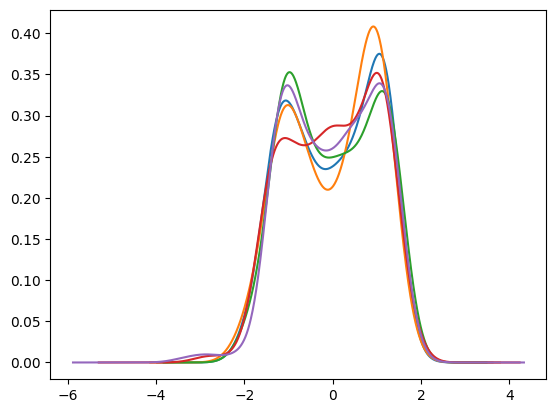

In [105]:
fig, ax = plt.subplots()
df_data =df
model3_data=model3.drop(columns=["bias"])
df_data.plot.kde(ax=ax, legend=False, title='Plot')
df_data.plot.hist(density=True, ax=ax)
model3_data.plot.hist(density=True, ax=ax)
ax.set_ylabel('Expression')
ax.grid(axis='y')
ax.set_facecolor('#d8dcd6')

In [106]:
from scipy.stats import skew
skew(df)

/var/folders/qk/pjg5zqpj6cl2cp0cc32y_qzr0000gn/T/ipykernel_8830/2399811173.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skew(df)


array([-0.12764745, -0.21094679, -0.01292083, -0.21359028, -0.23201391,
               nan])

In [107]:
from scipy import stats
stats.mode(df, keepdims=True)

ModeResult(mode=array([[-2.07626468, -2.15150821, -2.00066995, -2.91575781, -3.32904086,
         1.        ]]), count=array([[  1.,   1.,   1.,   1.,   1., 301.]]))

In [80]:
df.median()

one      0.045614
two      0.111657
three   -0.002309
four     0.050385
five     0.064425
bias     1.000000
dtype: float64

In [108]:
df.describe()

,one,two,three,four,five,bias
count,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,3.010000e+02,301.0
mean,1.534395e-16,3.304850e-16,-2.655683e-16,6.491670e-17,-2.242577e-16,1.0
std,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,1.001665e+00,0.0
min,-2.076265e+00,-2.151508e+00,-2.000670e+00,-2.915758e+00,-3.329041e+00,1.0
25%,-9.494526e-01,-9.407143e-01,-9.348571e-01,-8.750910e-01,-8.791995e-01,1.0
50%,4.561413e-02,1.116574e-01,-2.309006e-03,5.038451e-02,6.442491e-02,1.0
75%,9.921034e-01,9.214947e-01,9.863813e-01,9.432543e-01,9.475699e-01,1.0
max,1.722420e+00,1.808269e+00,1.655174e+00,1.851159e+00,1.778877e+00,1.0
